# <a> Import Dependency </a>

In [1]:
# loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import ast
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # convert a text into a vector
from sklearn.metrics.pairwise import cosine_similarity 


import warnings
warnings.filterwarnings("ignore")

#### <a> Load Dataset <a>

In [2]:
# loading dataset
movies = pd.read_csv("tmdb_5000_movies.csv")
credits = pd.read_csv("tmdb_5000_credits.csv")

In [3]:
print(f"In movies dataset \nNumber of rows:-  {movies.shape[0]} \nNumber of columns :- {movies.shape[1]}")

In movies dataset 
Number of rows:-  4803 
Number of columns :- 20


In [4]:
print(f"In credits dataset \nNumber of rows:-  {credits.shape[0]} \nNumber of columns :- {credits.shape[1]}")

In credits dataset 
Number of rows:-  4803 
Number of columns :- 4


In [5]:
movies = movies.merge(credits, on = "title") # merge both the dataset based on title olumn

In [6]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
print(f"After merging the datasets \nNumber of Rows :- {movies.shape[0]} \nNumber of Columns :- {movies.shape[1]}")

After merging the datasets 
Number of Rows :- 4809 
Number of Columns :- 23


###  Extracting the important columns from the dataset for recommendation.
#### Important columns are 
- genres
- id
- keywords
- Title
- overview
- cast
- crew

In [8]:
movies = movies[["movie_id", "genres", "keywords","title","overview","cast","crew"]]
movies.head()

,movie_id,genres,keywords,title,overview,cast,crew
0,19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre,A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",John Carter,"John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [9]:
# Checking Missing values
missing_values = movies.isnull().sum().sort_values(ascending=False)
missing_percent = (movies.isnull().sum()/ movies.shape[0] * 100).sort_values(ascending=False)
pd.concat([missing_values,missing_percent], axis = 1, keys = ["missing_values" , "missing_percent"]).transpose()

,overview,movie_id,genres,keywords,title,cast,crew
missing_values,3.000000,0.0,0.0,0.0,0.0,0.0,0.0
missing_percent,0.062383,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
movies.dropna(inplace=True) # droping the missing values

In [11]:
# Checking Duplicates Values
duplicate_count = movies.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


## <a> Data Prepration </a>

- We need to convert a dict into list
-  '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'
- ["Action", "Adventure", "Fantasy","SciFi"]


In [12]:
def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i["name"])
    return L

In [13]:
movies["genres"] = movies["genres"].apply(convert)
movies["keywords"] = movies["keywords"].apply(convert)

In [14]:
def lead3(obj):
    L = []
    count = 0
    for i in ast.literal_eval(obj):
        if count < 3:
            L.append(i["name"])
            count += 1
        else:
            break
    return L

In [15]:
movies["cast"] = movies["cast"].apply(lead3)

In [16]:
# fetch director name
def fetch_director(obj):
    L = []
    for i in ast.literal_eval(obj):
        if i["job"] == 'Director':
            L.append(i["name"])
            break
    return L

In [17]:
movies["crew"] = movies["crew"].apply(fetch_director)

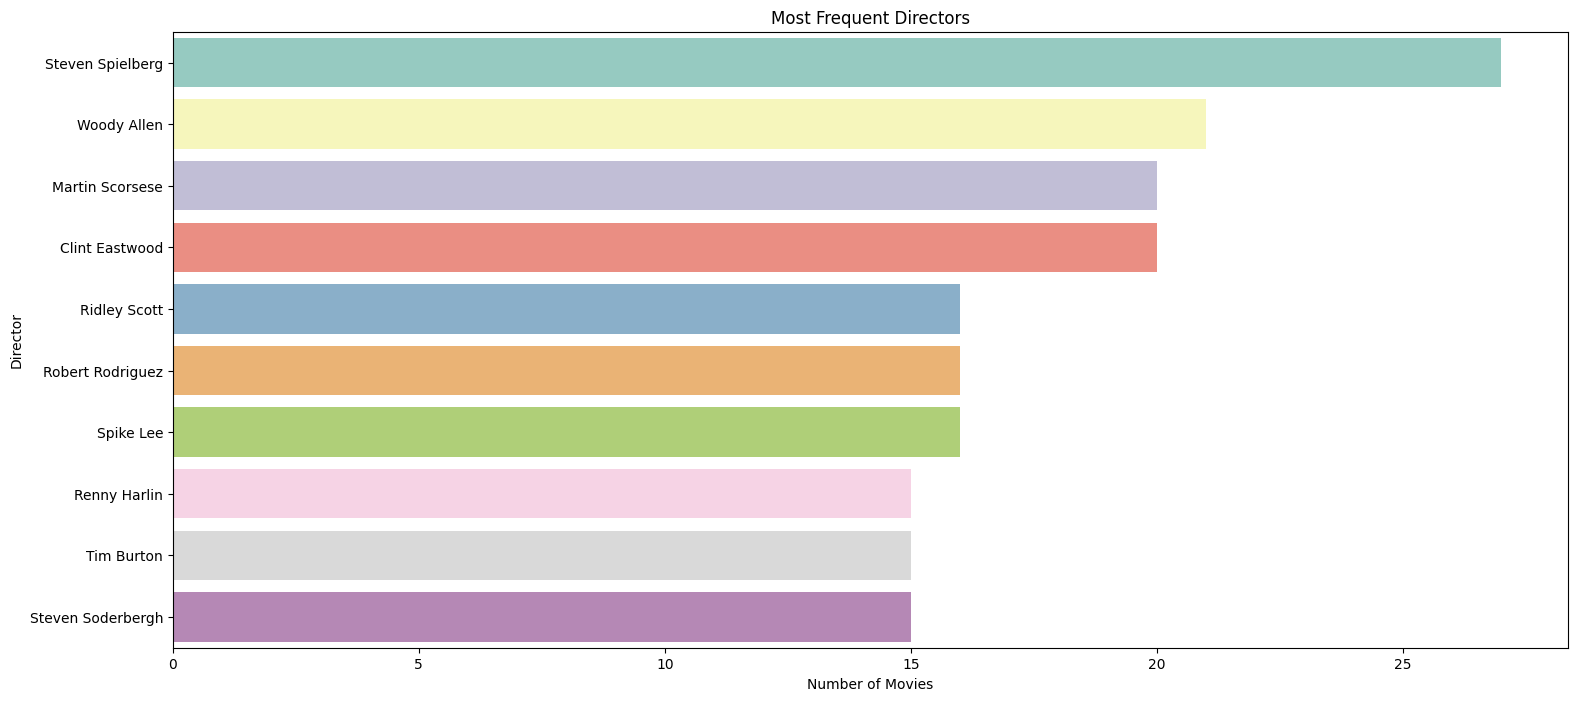

In [18]:
movies["director"] = movies["crew"].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)


director_counts = movies["director"].value_counts().head(10).reset_index()
director_counts.columns = ["director", "count"]

# Plot
plt.figure(figsize=(18,8))
sns.barplot(data=director_counts, x ="count", y="director", palette="Set3")
plt.title("Most Frequent Directors")
plt.xlabel("Number of Movies")
plt.ylabel("Director")
plt.show()

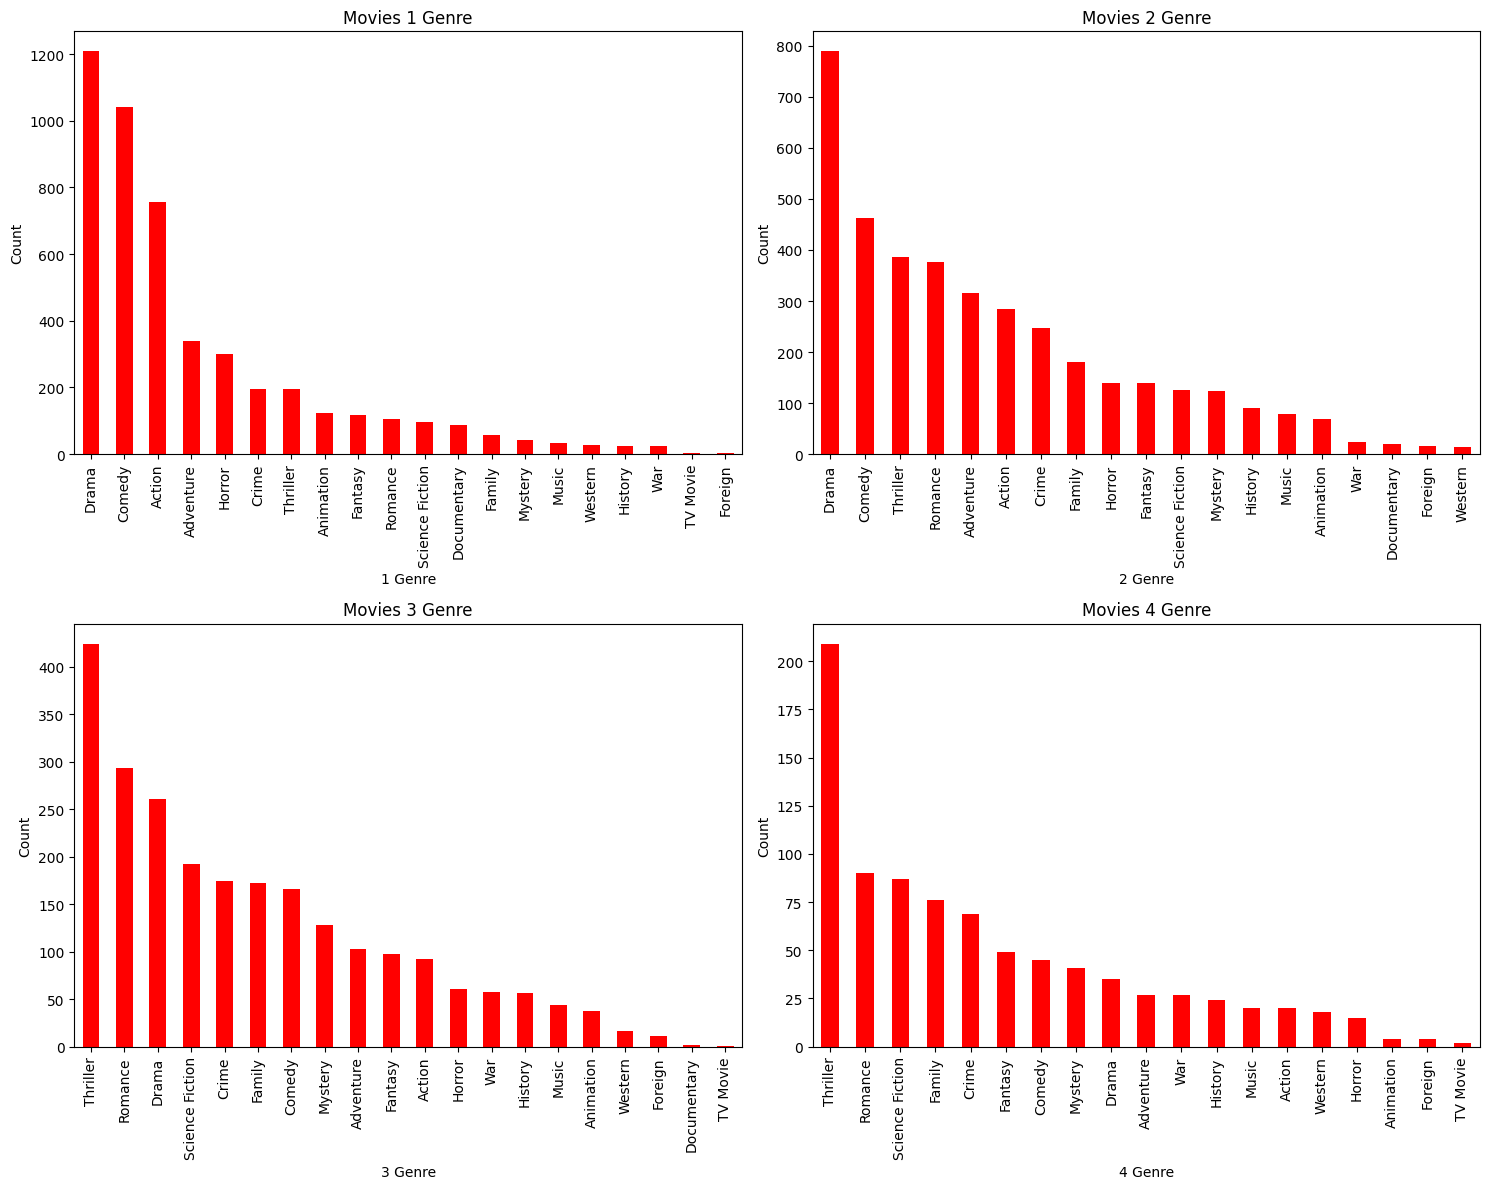

In [19]:
def get_genre_at_position(genres, pos):
    if isinstance(genres, list) and len(genres) > pos:
        return genres[pos]
    return None

plt.figure(figsize=(15, 12))

for i in range(4):
    genre_i = movies["genres"].apply(lambda g: get_genre_at_position(g, i))
    counts = genre_i.value_counts()

    plt.subplot(2, 2, i + 1)
    counts.plot(kind="bar", color="red")
    plt.title(f"Movies {i+1} Genre")  # Better title
    plt.ylabel("Count")
    plt.xlabel(f"{i+1} Genre")

plt.tight_layout()
plt.show()

In [20]:
movies["overview"] = movies["overview"].apply(lambda x: x.split())

In [21]:
movies = movies[["movie_id","title", "overview","genres","keywords","cast","crew"]]
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [22]:
movies["genres"]  = movies["genres"].apply(lambda x:[i.replace(" ","") for i in x])
movies["keywords"]  = movies["keywords"].apply(lambda x:[i.replace(" ","") for i in x])
movies["cast"]  = movies["cast"].apply(lambda x:[i.replace(" ","") for i in x])
movies["crew"]  = movies["crew"].apply(lambda x:[i.replace(" ","") for i in x])

In [23]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [24]:
# We make a new dataframe id, title, tags
movies["tags"] = movies["overview"] + movies["genres"] + movies["keywords"] + movies["cast"] + movies["crew"]

In [25]:
new_df = movies[["movie_id","title","tags"]]
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [26]:
new_df["tags"] = new_df["tags"].apply(lambda x:" ".join(x))

In [27]:
new_df["tags"] = new_df["tags"].apply(lambda x:x.lower())

In [28]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


## <a> Building Recommendetion System </a>

In [29]:
cv = CountVectorizer(max_features=5000, stop_words="english")
vectors = cv.fit_transform(new_df["tags"]).toarray()

In [30]:
vectors.shape

(4806, 5000)

In [31]:
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
similarity = cosine_similarity(vectors)

In [33]:
similarity

array([[1.        , 0.08964215, 0.05976143, ..., 0.02519763, 0.02817181,
        0.        ],
       [0.08964215, 1.        , 0.0625    , ..., 0.02635231, 0.        ,
        0.        ],
       [0.05976143, 0.0625    , 1.        , ..., 0.02635231, 0.        ,
        0.        ],
       ...,
       [0.02519763, 0.02635231, 0.02635231, ..., 1.        , 0.0745356 ,
        0.04836508],
       [0.02817181, 0.        , 0.        , ..., 0.0745356 , 1.        ,
        0.05407381],
       [0.        , 0.        , 0.        , ..., 0.04836508, 0.05407381,
        1.        ]], shape=(4806, 4806))

In [34]:
new_df[new_df["title"] == "The Lego Movie"].index[0]

np.int64(744)

In [36]:
def recommend(movie):
    index = new_df[new_df['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(new_df.iloc[i[0]].title)

In [37]:
recommend("The Dark Knight")

The Dark Knight Rises
Batman Begins
Batman Returns
Batman Forever
Batman & Robin


In [39]:
import pickle

In [40]:
pickle.dump(new_df,open('movie_list.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))